In [1]:
import numpy as np
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# Load data
bunch = load_boston()
data = bunch.data
target = bunch.target # Median value of owner-occupied homes in $1000's
column_names = bunch.feature_names


# Read data into pandas dataframe
df = pd.DataFrame(data=data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a200d1f90>]],
      dtype=object)

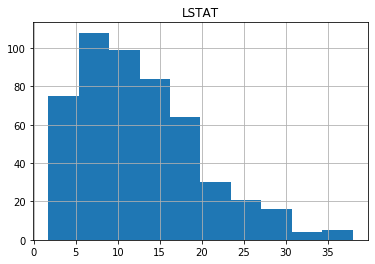

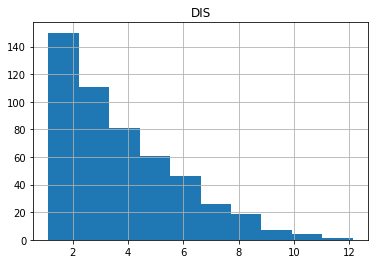

In [2]:
# Plot histograms
df.hist(column="LSTAT")
df.hist(column="DIS")

[('CHAS', 0.03071612970877491),
 ('DIS', 0.06246437212178257),
 ('B', 0.11119611824636277),
 ('ZN', 0.12992084489428946),
 ('AGE', 0.14209474407780442),
 ('RAD', 0.14563857991232532),
 ('CRIM', 0.15078046904975717),
 ('NOX', 0.182603042501699),
 ('TAX', 0.21952592104421917),
 ('INDUS', 0.2339900304444752),
 ('PTRATIO', 0.257847318009223),
 ('RM', 0.4835254559913343),
 ('LSTAT', 0.5441462975864799)]


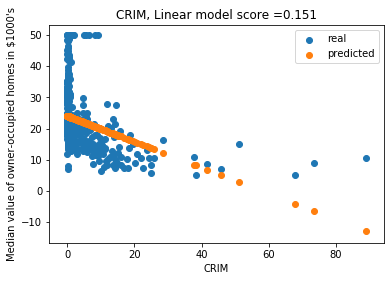

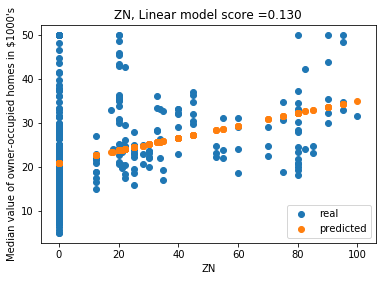

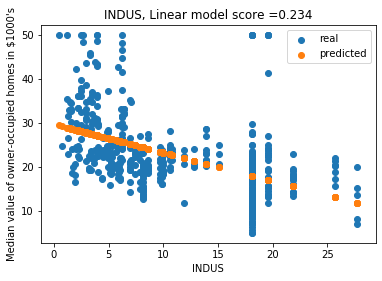

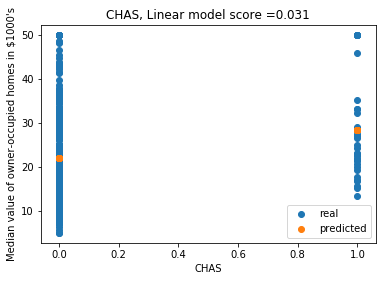

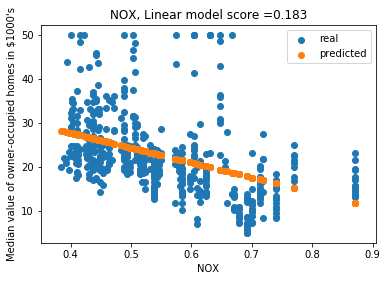

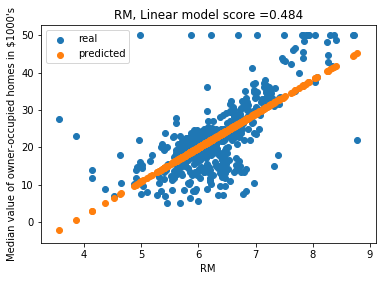

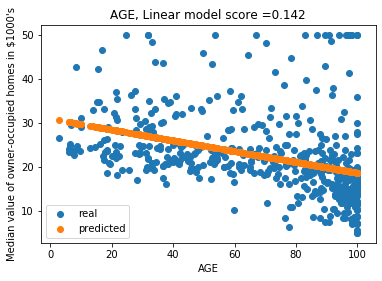

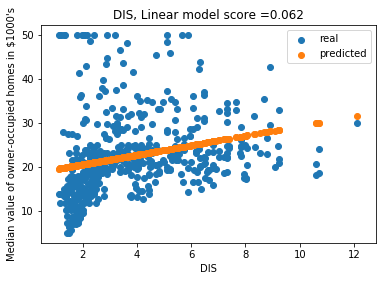

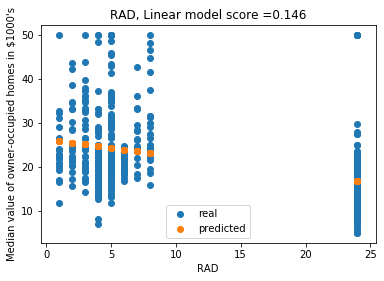

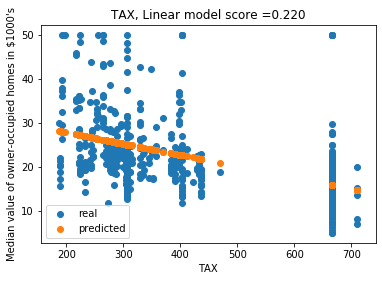

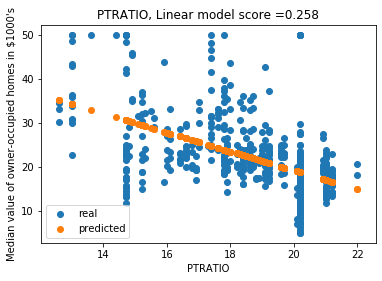

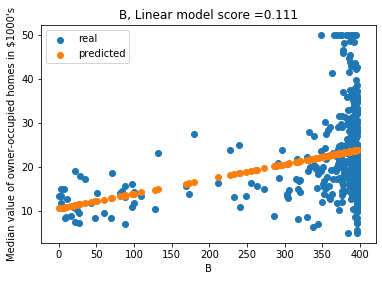

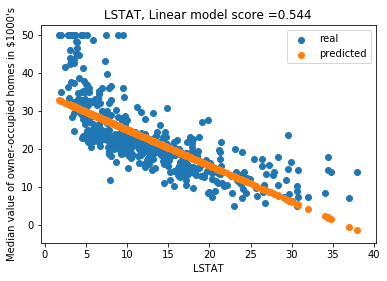

<Figure size 432x288 with 0 Axes>

In [3]:
# Searching for correlation in all columns (instead of just two)
scores = []
for column_name in df.columns:
    column = df[column_name].values.reshape(-1, 1)
    reg = LinearRegression().fit(column, target)
    predicted_target = reg.predict(column)
    score = reg.score(column, target)
    scores.append( (column_name, score) )
    
    plt.scatter(column, target, label="real")
    plt.scatter(column, predicted_target, label="predicted")
    plt.title("{0}, Linear model score ={1:.3f}".format(column_name, score))
    plt.xlabel(column_name)
    plt.ylabel("Median value of owner-occupied homes in $1000's")
    plt.legend()
    plt.figure()

pp.pprint(sorted(scores, key=lambda x: x[1]))

In [4]:
# Conclusions
# Unsuprisingly the median value of homes in a town is lineary dependant on features like:
#     LSTAT - full-value property-tax rate per $10,000 - negatively
#     RM - average number of rooms per dwelling - positively

# And is not lineary dependant on features like:
#     CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) - because it's binary
#     DIS - weighted distances to five Boston employment centres